In [4]:
import requests
import json
import twython
import time
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

# Set your header according to the form below
# :: (by /u/)

# Add your username below
hdr = {'User-Agent': 'windows:r/politics.single.result:v1.0' +
       '(by /u/)'}
url = 'https://www.reddit.com/r/politics/.json'
req = requests.get(url, headers=hdr)
json_data = json.loads(req.text)

posts = json.dumps(json_data['data']['children'], indent=4, sort_keys=True)
print(posts)

#loop to get 1000 posts. Must have 2 sec break to not violate API rules

data_all = json_data['data']['children']
num_of_posts = 0
while len(data_all) <= 100:
    time.sleep(2)
    last = data_all[-1]['data']['name']
    url = 'https://www.reddit.com/r/politics/.json?after=' + str(last)
    req = requests.get(url, headers=hdr)
    data = json.loads(req.text)
    data_all += data['data']['children']
    if num_of_posts == len(data_all):
        break
    else:
        num_of_posts = len(data_all)

#Label data for NLTK
sia = SIA()
pos_list = []
neg_list = []
for post in data_all:
    res = sia.polarity_scores(post['data']['title'])

    print(res)
    
    if res['compound'] > 0.2:
        pos_list.append(post['data']['title'])
    elif res['compound'] < -0.2:
        neg_list.append(post['data']['title'])

with open("pos_news_titles.txt", "w", encoding='utf-8',
          errors='ignore') as f_pos:
    for post in pos_list:
        f_pos.write(post + "\n")

with open("neg_news_titles.txt", "w", encoding='utf-8',
          errors='ignore') as f_neg:
    for post in neg_list:
        f_neg.write(post + "\n")



[
    {
        "data": {
            "approved_at_utc": null,
            "approved_by": null,
            "archived": false,
            "author": "optimalg",
            "author_flair_css_class": "un-flag",
            "author_flair_text": "Foreign",
            "banned_at_utc": null,
            "banned_by": null,
            "brand_safe": true,
            "can_gild": false,
            "can_mod_post": false,
            "clicked": false,
            "contest_mode": false,
            "created": 1517702385.0,
            "created_utc": 1517673585.0,
            "distinguished": "moderator",
            "domain": "self.politics",
            "downs": 0,
            "edited": false,
            "gilded": 0,
            "hidden": false,
            "hide_score": false,
            "id": "7v03ol",
            "is_crosspostable": false,
            "is_reddit_media_domain": false,
            "is_self": true,
            "is_video": false,
            "likes": null,
            "link_f

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.431, 'neu': 0.569, 'pos': 0.0, 'compound': -0.5849}
{'neg': 0.0, 'neu': 0.711, 'pos': 0.289, 'compound': 0.2584}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.33, 'neu': 0.67, 'pos': 0.0, 'compound': -0.7506}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.259, 'neu': 0.586, 'pos': 0.155, 'compound': -0.3612}
{'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'compound': -0.0572}
{'neg': 0.138, 'neu': 0.692, 'pos': 0.17, 'compound': 0.128}
{'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'compound': -0.0516}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.08, 'neu': 0.844, 

In [8]:
#Setup Tokenizers and Stopwords
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import math

example = "This is an example sentence! However, it " \
          "is a very informative one,"

print(word_tokenize(example, language='english'))
tokenizer = RegexpTokenizer(r'\w+')
print(tokenizer.tokenize(example))


['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', 'a', 'very', 'informative', 'one', ',']
['This', 'is', 'an', 'example', 'sentence', 'However', 'it', 'is', 'a', 'very', 'informative', 'one']


In [11]:
#to print ALL stop words list
stop_words = set(stopwords.words('english'))
#print(stop_words)

In [13]:
#gather and store all the positive words (meaning the words on positive headlines), and try to extract any valuable insight on them.
all_words_pos = []
with open("pos_news_titles.txt", "r", encoding='utf-8',
         errors='ignore') as f_pos:
    for line in f_pos.readlines():
        words = tokenizer.tokenize(line)
        for w in words:
            if w.lower() not in stop_words:
                all_words_pos.append(w.lower())

#frequency of each word
pos_res = nltk.FreqDist(all_words_pos)
print(pos_res.most_common(8))

[('trump', 7), ('ryan', 5), ('1', 5), ('50', 5), ('memo', 4), ('says', 4), ('probe', 4), ('vindicates', 3)]


Using matplotlib backend: MacOSX


In [16]:
#gather for negative words
all_words_neg = []
with open("neg_news_titles.txt", "r", encoding='utf-8',
         errors='ignore') as f_neg:
    for line in f_neg.readlines():
        words = tokenizer.tokenize(line)
        for w in words:
            if w.lower() not in stop_words:
                all_words_neg.append(w.lower())

neg_res = nltk.FreqDist(all_words_neg)
print(neg_res.most_common(8))

[('trump', 13), ('memo', 5), ('gowdy', 3), ('russia', 3), ('rule', 3), ('donald', 3), ('tweet', 3), ('panetta', 2)]


Using matplotlib backend: MacOSX


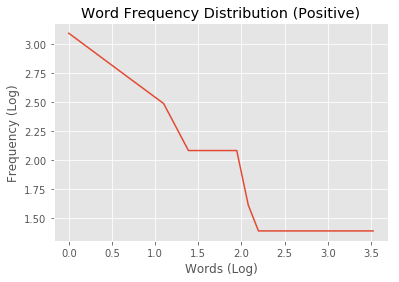

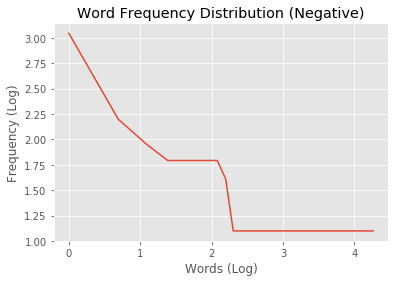

In [23]:
#plot positive results
#%matplotlib
%matplotlib inline


#Code for log-log plots
plt.style.use('ggplot')

y_val = [x[1] for x in pos_res.most_common(len(all_words_pos))]
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i+k+z+t))
x_val = [math.log(i+1) for i in range(len(y_final))]

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

y_val = [x[1] for x in neg_res.most_common(len(all_words_neg))]
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i+k+z == 0:
        break
    y_final.append(math.log(i+k+z))
x_val = [math.log(i+1) for i in range(len(y_final))]

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


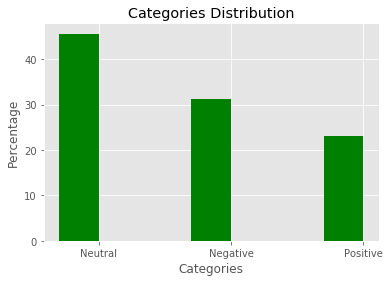

In [26]:
#for bar chart
import numpy as np
%matplotlib inline

# For the bar-chart distribution
y_val = [448/982*100, 307/982*100, 227/982*100]
x_val = [1, 2, 3]
plt.style.use('ggplot')

ind = np.arange(len(x_val))
width = 0.3
fig, ax = plt.subplots()
ax.bar(ind+0.1, y_val,width, color='green')
ax.set_xticks(ind+0.1+width/2)
ax.set_xticklabels(['Neutral', 'Negative', 'Positive'])
ax.legend()
plt.title("Categories Distribution")
plt.xlabel("Categories")
plt.ylabel("Percentage")